In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pull_from_wandb = False

if pull_from_wandb:
    import wandb

    api = wandb.Api()
    runs = api.runs("lavender/i2b2_2012_compare_new")

    summary_list = []
    config_list = []
    name_list = []

    for run in runs:
        # run.summary are the output key/values like accuracy.
        # We call ._json_dict to omit large files
        summary_list.append(run.summary._json_dict)

        # run.config is the input metrics.
        # We remove special values that start with _.
        conf = run.config
        config = {k: v for k, v in conf.items() if not k.startswith("_")}
        config_list.append(config)

        # run.name is the name of the run.
        name_list.append(run.name)

    summary_df = pd.DataFrame.from_records(summary_list)
    config_df = pd.DataFrame.from_records(config_list)
    name_df = pd.DataFrame({"name": name_list})
    all_df = pd.concat([name_df, config_df, summary_df], axis=1)

    all_df.to_csv("eval_i2b2.csv")
else:
    all_df = pd.read_csv("eval_i2b2.csv")

In [3]:
df = all_df[
    ["run_name", "eval/overall_f1", "eval/overall_precision", "eval/overall_recall"]
]
df

,run_name,eval/overall_f1,eval/overall_precision,eval/overall_recall
0,i2b2-2012-finetuning-gatortron-og,0.797225,0.772879,0.823156
1,i2b2-2012-finetuning-nyutron,0.793443,0.768310,0.820276
2,i2b2-2012-finetuning-random_init,0.427323,0.365366,0.514583
3,i2b2-2012-finetuning-gatortron,0.794098,0.771039,0.818578
4,i2b2-2012-finetuning-biobert,0.776464,0.754299,0.799970
5,i2b2-2012-finetuning-bert,0.756839,0.728484,0.787492
6,i2b2-2012-finetuning-gatortron,0.797488,0.775668,0.820572
7,i2b2-2012-finetuning-biobert,0.773299,0.749256,0.798937
8,i2b2-2012-finetuning-biobert,0.773299,0.749256,0.798937
9,i2b2-2012-finetuning-random_init,0.426962,0.361216,0.521967


In [4]:
def extract_model(name):
    res = name.split("-")[-1]
    return res


extract_model("i2b2-2012-finetuning-nyutron")

'nyutron'

In [5]:
df["model"] = df.apply(lambda r: extract_model(r["run_name"]), axis=1)
df

/tmp/ipykernel_25274/641300376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df.apply(lambda r: extract_model(r['run_name']), axis=1)


,run_name,eval/overall_f1,eval/overall_precision,eval/overall_recall,model
0,i2b2-2012-finetuning-gatortron-og,0.797225,0.772879,0.823156,og
1,i2b2-2012-finetuning-nyutron,0.793443,0.768310,0.820276,nyutron
2,i2b2-2012-finetuning-random_init,0.427323,0.365366,0.514583,random_init
3,i2b2-2012-finetuning-gatortron,0.794098,0.771039,0.818578,gatortron
4,i2b2-2012-finetuning-biobert,0.776464,0.754299,0.799970,biobert
5,i2b2-2012-finetuning-bert,0.756839,0.728484,0.787492,bert
6,i2b2-2012-finetuning-gatortron,0.797488,0.775668,0.820572,gatortron
7,i2b2-2012-finetuning-biobert,0.773299,0.749256,0.798937,biobert
8,i2b2-2012-finetuning-biobert,0.773299,0.749256,0.798937,biobert
9,i2b2-2012-finetuning-random_init,0.426962,0.361216,0.521967,random_init


In [6]:
metric_cols = ["eval/overall_f1", "eval/overall_precision", "eval/overall_recall"]
new_dfs = []
for metric_col in metric_cols:
    new_df = df[["model", metric_col]]
    new_df = new_df.rename(columns={metric_col: "metric_val"})
    new_df["metric_name"] = metric_col.split("/")[-1]
    new_dfs.append(new_df)

plot_df = pd.concat(new_dfs, ignore_index=True)
plot_df

,model,metric_val,metric_name
0,og,0.797225,overall_f1
1,nyutron,0.793443,overall_f1
2,random_init,0.427323,overall_f1
3,gatortron,0.794098,overall_f1
4,biobert,0.776464,overall_f1
...,...,...,...
85,nyutron,0.821753,overall_recall
86,nyutron,0.821974,overall_recall
87,nyutron,0.821974,overall_recall
88,og,0.823230,overall_recall


In [7]:
replace_d = {
    "og": "web-wiki\n+bio\n+clinical",
    "gatortron": "mix-S",
    "bert": "web-wiki",
    "nyutron": "NYUTron\n(clinical, ours)",
    "biobert": "web-wiki\n+bio",
    "random_init": "random-init",
}
plot_df["model"] = plot_df["model"].replace(replace_d)

In [8]:
models = [
    "web-wiki\n+bio\n+clinical",
    "web-wiki",
    "NYUTron\n(clinical, ours)",
    "web-wiki\n+bio",
    "random-init",
]
plot_df = plot_df[plot_df.model.isin(models)]
plot_df.model.unique()

array(['web-wiki\n+bio\n+clinical', 'NYUTron\n(clinical, ours)',
       'random-init', 'web-wiki\n+bio', 'web-wiki'], dtype=object)

In [9]:
plot_df["model"] = pd.Categorical(
    plot_df.model,
    categories=[
        "NYUTron\n(clinical, ours)",
        "web-wiki\n+bio\n+clinical",
        "web-wiki\n+bio",
        "web-wiki",
        "random-init",
    ],
    ordered=True,
)
plot_df.model

/tmp/ipykernel_25274/188655264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["model"] = pd.Categorical(plot_df.model,


0     web-wiki\n+bio\n+clinical
1     NYUTron\n(clinical, ours)
2                   random-init
4                web-wiki\n+bio
5                      web-wiki
                ...            
85    NYUTron\n(clinical, ours)
86    NYUTron\n(clinical, ours)
87    NYUTron\n(clinical, ours)
88    web-wiki\n+bio\n+clinical
89    web-wiki\n+bio\n+clinical
Name: model, Length: 75, dtype: category
Categories (5, object): ['NYUTron\n(clinical, ours)' < 'web-wiki\n+bio\n+clinical' < 'web-wiki\n+bio' < 'web-wiki' < 'random-init']

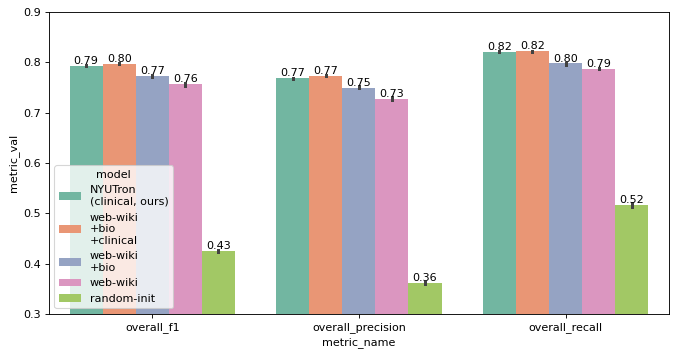

In [10]:
fig = plt.figure(figsize=(10, 5), dpi=80)
ax = sns.barplot(
    data=plot_df,
    x="metric_name",
    y="metric_val",
    hue="model",
    palette=sns.color_palette("Set2", 6),
)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.ylim([0.3, 0.9])
fig.savefig("i2b2_full.png", dpi=300)

In [11]:
plot_df.model.unique()

['web-wiki\n+bio\n+clinical', 'NYUTron\n(clinical, ours)', 'random-init', 'web-wiki\n+bio', 'web-wiki']
Categories (5, object): ['NYUTron\n(clinical, ours)' < 'web-wiki\n+bio\n+clinical' < 'web-wiki\n+bio' < 'web-wiki' < 'random-init']

reference: https://stackoverflow.com/questions/59305080/formatting-a-broken-y-axis-in-python-matplotlib

/tmp/ipykernel_25274/323278459.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=plot_df[plot_df.metric_name=='overall_f1'], x="model", y="metric_val",
/tmp/ipykernel_25274/323278459.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="model", y="metric_val", data=plot_df[plot_df.metric_name=='overall_f1'], dodge=True, alpha=0.7,
/tmp/ipykernel_25274/323278459.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.stripplot(x="model", y="metric_val", data=plot_df[plot_df.metric_name=='overall_f1'], dodge=True, alpha=0.7,
/tmp/ipykernel_25274/323278459.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=plot_df[plot_df.metric_name=='overall_f1'], x="model", y="metric_val",
/tmp/ipykernel_25274/323278459.py:9: FutureWarning: Passing `palette` without assigning `h

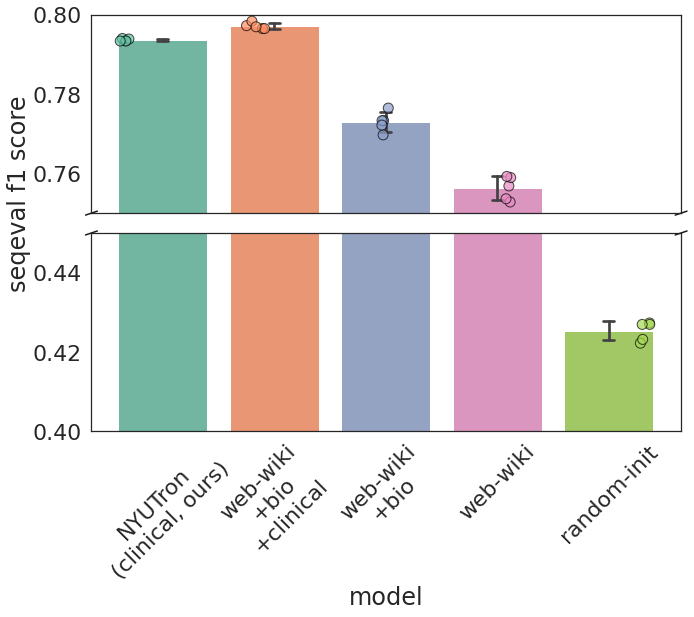

In [19]:
sns.set(style="white", rc={"figure.figsize": (11.7, 8.27)}, font_scale=2)
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True)
sns.barplot(
    data=plot_df[plot_df.metric_name == "overall_f1"],
    x="model",
    y="metric_val",
    palette=sns.color_palette("Set2", 6),
    ax=ax1,
    ci="sd",
    capsize=0.1,
)
sns.stripplot(
    x="model",
    y="metric_val",
    data=plot_df[plot_df.metric_name == "overall_f1"],
    dodge=True,
    alpha=0.7,
    palette=sns.color_palette("Set2", 6),
    ax=ax1,
    s=10,
    jitter=0.5,
    linewidth=1,
    edgecolor="black",
)
sns.barplot(
    data=plot_df[plot_df.metric_name == "overall_f1"],
    x="model",
    y="metric_val",
    palette=sns.color_palette("Set2", 6),
    ax=ax2,
    ci="sd",
    capsize=0.1,
)
sns.stripplot(
    x="model",
    y="metric_val",
    data=plot_df[plot_df.metric_name == "overall_f1"],
    dodge=True,
    alpha=0.7,
    palette=sns.color_palette("Set2", 6),
    ax=ax2,
    s=10,
    jitter=0.3,
    linewidth=1,
    edgecolor="black",
)
ax1.set_ylim([0.75, 0.8])
ax2.set_ylim([0.4, 0.45])
# by default, each part will get its own "Latency in ms" label, but we want to set a common for the whole figure
# first, remove the y label for both subplots
ax1.set_ylabel("")
ax2.set_ylabel("")
# the upper part does not need its own x axis as it shares one with the lower part
ax1.get_xaxis().set_visible(False)
f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.05, 0.55, "seqeval f1 score", va="center", rotation="vertical")
d = 0.01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.xticks(rotation=45)
plt.savefig("i2b2_f1.png", bbox_inches="tight", dpi=300)
plt.savefig("ext_5b.png", bbox_inches="tight", dpi=300)

In [13]:
plot_df[plot_df.model == "random_init"]

,model,metric_val,metric_name


In [14]:
f1_table = plot_df[plot_df.metric_name == "overall_f1"]
f1_table.groupby("model").mean()

,metric_val
model,
"NYUTron\n(clinical, ours)",0.793599
web-wiki\n+bio\n+clinical,0.797102
web-wiki\n+bio,0.772989
web-wiki,0.756290
random-init,0.425335


In [15]:
f1_table.groupby("model").std()

,metric_val
model,
"NYUTron\n(clinical, ours)",0.000297
web-wiki\n+bio\n+clinical,0.000766
web-wiki\n+bio,0.002435
web-wiki,0.002977
random-init,0.002420
